# K-Nearest Neighbours (Regression)

K-Nearest Neighbours is one of the most basic yet essential classification algorithms in Machine Learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining and intrusion detection.

It is widely disposable in real-life scenarios since it is non-parametric, meaning, it does not make any underlying assumptions about the distribution of data.



## Importing Necessary Libraries

In [1]:
# Importing numpy which is library used for high level matrix manupilations
import numpy as np

# Matplotlib is library used to prepared graphs and visualization
import matplotlib.pyplot as plt

# We are using scikit-learn datasets to make dummy regression data
from sklearn import datasets

import pandas as pd

## Making regression dataset

We have created dataset which has 200 samples; having 2 independent variables and 1 dependent variable

**X contains 2 independent variables and y contains dependent variable**

In [49]:
X, y = datasets.make_regression(n_samples=500, n_features=3, random_state = 2)

In [50]:
X.shape

(500, 3)

In [51]:
y.shape

(500,)

Distribution of Training data

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


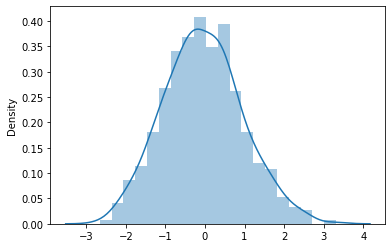

In [52]:
import seaborn as sns
sns.distplot(X[:,0],bins=20,kde=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


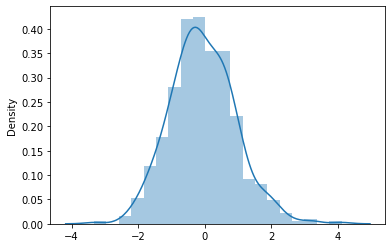

In [53]:
import seaborn as sns
sns.distplot(X[:,1],bins=20,kde=True)

so,the data are normaliy distributed we dont need to do standaization 

## Shuffling the data and getting the train set and test set

In [54]:
def shuffle_split(X, y, test_size = 0.2):
  shuffled_X = np.empty(X.shape, dtype=X.dtype)
  shuffled_y = np.empty(y.shape, dtype=y.dtype)
    # Generating the permuations of index
  permutation = np.random.permutation(len(X))
  for old_index, new_index in enumerate(permutation):
      shuffled_X[new_index] = X[old_index]
      shuffled_y[new_index] = y[old_index]

  sz = int(len(X)*(1-test_size))
  X_train = shuffled_X[0:sz]
  y_train = shuffled_y[0:sz]
  X_test = shuffled_X[sz:]
  y_test = shuffled_y[sz:] 

  return X_train, X_test, y_train, y_test


In [55]:
X_train, X_test, y_train, y_test= shuffle_split(X, y, test_size = 0.2)

## Visualizing the Dataset

Text(0.5, 1.0, 'The Relationship between 2 independent variables')

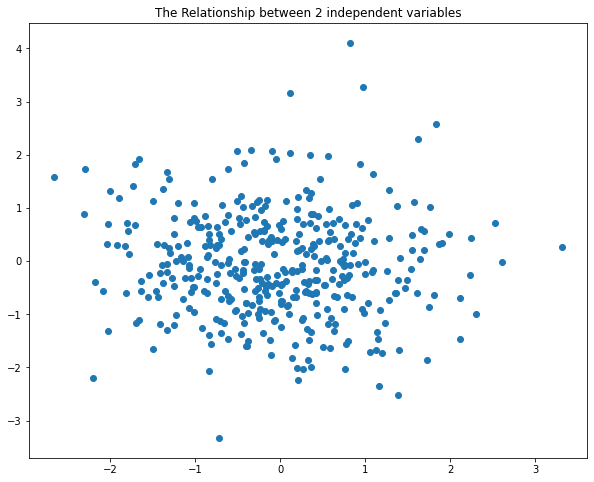

In [56]:
plt.figure(figsize= (10,8))
plt.scatter(X_train[:,0], X_train[:,1])
plt.title("The Relationship between 2 independent variables")

Text(0, 0.5, 'Y')

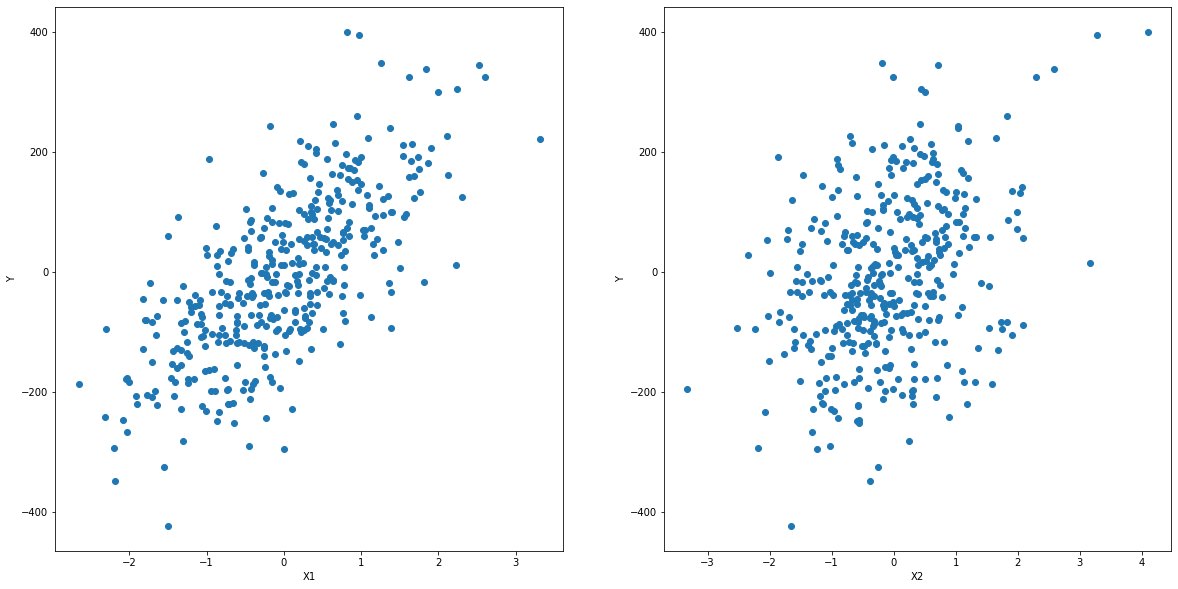

In [57]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
ax[0].scatter(X_train[:,0], y_train)
ax[0].set_xlabel("X1")
ax[0].set_ylabel('Y')
ax[1].scatter(X_train[:,1], y_train)
ax[1].set_xlabel("X2")
ax[1].set_ylabel('Y')

## Defing a function to Calculate the distance between 2 points

We will we using this function in building the model of K-Nearest Neighbour Function

In [58]:
def distance(test_x, train_x, p =2):
  '''
  inputs:

  test_x: it an instance of independent variables of test dataset
  train_x: it an instance of independent variables of train dataset
  p: when p = 1, it calculates Manhattan Distance, when p = 2 (default) it calculates Euclidean Distance; 
  Other values of p gives Minkowiski Distance

  Output:
  dist: Distance Calculated between 2 points

  '''
  
  s = test_x - train_x
  abs = np.absolute(s)
  dist = (np.sum(abs**p))**(1/p)
  return dist

## Creating function for K-Nearest Neighbour

In [59]:
def nearest_neighbor(test, train_data, p=2,k=1):
    '''
    The function calculates the most closest instances in the train data to the
    test instance and return the index of the sorted distance
    inputs:
    test: test_instance
    train: all the obervations in the train data
    k = number of nearest neighbour

    Output:
    returns indices of the sorted distance matrix for the test instance

    '''
    dis_list = [] # list for distances
    for row in train_data:
        # distance
        d = distance(test , row, p)
        dis_list.append(d)
    # sort distance list and getting the indices of the sorted list
    sorted_ids = np.argsort(dis_list)

    #indices of the k most closest candidate vectors
    k_id = sorted_ids[:k]
    return k_id

## Compiling all and making the Final Model of K-NN ready for prediction on test Data

In [60]:
def predict(train_feature, train_labels, test_features,p=2, k =2):
  '''
  Function to predict the dependent variable of test data

  Inputs:
  train_feature (X_train): Training Data
  train_labels(y_train): Dependent Variable in training Data
  test_features(X_test): Independent Variables in Test Data
  k: Number of Nearest Neighbours

  Outputs:

  predicted Dependent Variable


  '''
  y_l = []
  test_size = len(test_features)
  for i in range(test_size):
    k_id = nearest_neighbor(test_features[i], train_feature, p, k)
    
    y = np.mean(train_labels[k_id])
    y_l.append(y)
  
  return np.array(y_l)

In [61]:
def rt_mean_squared_error(y_true, y_pred):
  '''
  Inputs:
  y_true: True Dependent Variable
  y_pred: Estimated/Predicted Dependent Variable

  Outputs:
  error: Root Mean Squared error
  '''
  error = np.sqrt(np.mean((y_true-y_pred)**2))
  return error

## Prediction of using KNN Model

In [62]:
y_pred = predict(X_train, y_train, X_test,p=1, k =2)

In [63]:
#y_pred

In [64]:
rt_mean_squared_error(y_test, y_pred)

27.65688171149105

## Model Evaluation

In [69]:
line0 = np.linspace(X_train[:,0].min(),X_train[:,0].max())
line1 = np.linspace(X_train[:,1].min(),X_train[:,1].max())
line2 = np.linspace(X_train[:,2].min(),X_train[:,2].max())
line = np.c_[line0, line1, line2]
line.shape

(50, 3)

In [70]:
pred_line = predict(X_train, y_train, line, p=2, k =3)

Text(0, 0.5, 'y Dependent Variable')

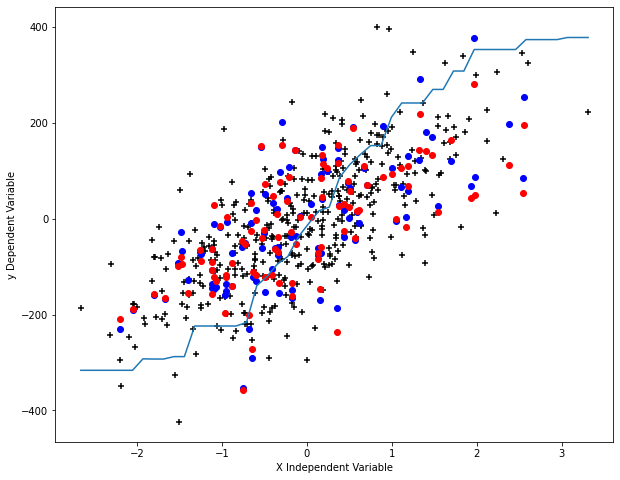

In [71]:
plt.figure(figsize=(10, 8))
plt.scatter(X_train[:,0],y_train, c='black', marker='+')
plt.scatter(X_test[:,0],y_test, c='blue')
plt.scatter(X_test[:,0], y_pred, c ='red')
plt.plot(line0, pred_line)
plt.xlabel("X Independent Variable")
plt.ylabel('y Dependent Variable')

## Evaluating best K

In [72]:
err=[]
for n in range(1,30):
    pred_y=predict(X_train, y_train , X_test, k=n) 
    error=rt_mean_squared_error(y_test,pred_y)
    err.append(error)
    

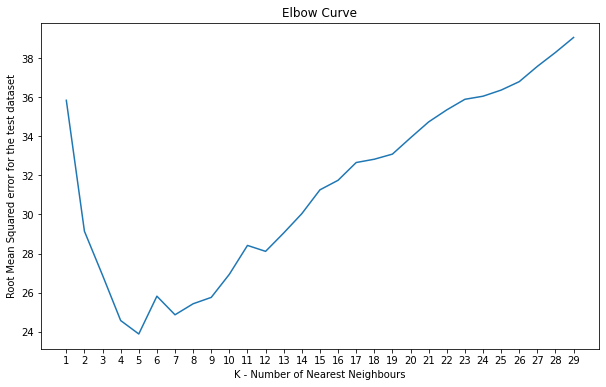

In [73]:
plt.figure(figsize=(10,6))
plt.xticks(range(1,30))
plt.plot(range(1,30),err)
plt.xlabel('K - Number of Nearest Neighbours')
plt.ylabel('Root Mean Squared error for the test dataset')
plt.title("Elbow Curve")
plt.show()

**We can see the elbow is at K = 5. We can say that best K for the dataset is 5**